In [1]:
import os
# Change the working directory to the project's root
project_root = os.path.dirname(os.getcwd())
os.chdir(project_root)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import rioxarray
import re
from src.utils import *

### Loading data

In [4]:
from csv import excel
from prep_func import dn_sample_sig
import pickle
import pandas as pd
from src.misc import remove_columns_ending_with_0

zipped_h_im21_22 = pickle.load(open('data/ziped_h_21_22.pkl', 'rb'))
prep_h = pickle.load(open('data/preprocessed_data/prep_h.pkl', 'rb'))
veg_h = pickle.load(open('data/preprocessed_data/veg_h.pkl', 'rb'))
hyper_wave = np.linspace(398.573,1001.81,272)
hyper_wave_3 = dn_sample_sig(hyper_wave, 3)[0:80]
multi_wave = [475,560,668,717,840]

In [7]:
zipped_h_im21_22.keys()

dict_keys(['20210707', '20210715', '20210720', '20210802', '20210825', '20220707', '20220715', '20220726', '20220810', '20220818'])

In [8]:
for flight, dict in zipped_h_im21_22.items():
    for plot, im in dict.items():
        print(flight, plot, im.shape)

20210707 10 (272, 106, 59)
20210707 11 (272, 106, 58)
20210707 12 (272, 106, 58)
20210707 13 (272, 106, 58)
20210707 14 (272, 106, 58)
20210707 15 (272, 106, 58)
20210707 16 (272, 105, 58)
20210707 17 (272, 106, 58)
20210707 18 (272, 106, 58)
20210707 19 (272, 106, 58)
20210707 1 (272, 106, 58)
20210707 20 (272, 105, 58)
20210707 21 (272, 106, 58)
20210707 22 (272, 106, 58)
20210707 23 (272, 106, 58)
20210707 24 (272, 106, 58)
20210707 25 (272, 105, 58)
20210707 26 (272, 106, 59)
20210707 27 (272, 106, 58)
20210707 28 (272, 106, 58)
20210707 29 (272, 106, 58)
20210707 2 (272, 106, 58)
20210707 30 (272, 106, 58)
20210707 31 (272, 106, 58)
20210707 32 (272, 106, 58)
20210707 33 (272, 106, 58)
20210707 34 (272, 106, 59)
20210707 35 (272, 106, 58)
20210707 36 (272, 106, 58)
20210707 37 (272, 106, 58)
20210707 38 (272, 106, 58)
20210707 39 (272, 106, 58)
20210707 3 (272, 106, 58)
20210707 40 (272, 106, 58)
20210707 4 (272, 106, 58)
20210707 5 (272, 106, 58)
20210707 6 (272, 106, 59)
2021070

In [7]:
veg_h['20210715'][1].shape

(109, 60, 80)

In [9]:
veg_m = pickle.load(open('data/preprocessed_data/veg_im21_22.pkl', 'rb'))

In [10]:
veg_m['20210715'][1].shape

(311, 170, 5)

### Plot

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def plot_flt_images(veg_im_dict, flight, rb=108, gb=68, bb=32, gray_scale=False):
    images = veg_im_dict[flight]
    num_images = len(images)

    # Calculate the number of rows needed for the plot
    num_rows = num_images // 8
    if num_images % 8 != 0:
        num_rows += 1

    fig, axs = plt.subplots(num_rows, 8, figsize=(12, 2.5*num_rows))
    for plt_num, img in images.items():
        i=plt_num-1
        row = i // 8
        col = i % 8
        if gray_scale:
            # Plot in grayscale
            img.squeeze().plot.imshow(ax=axs[row, col], cmap='Reds', add_colorbar=True, cbar_kwargs={'shrink': 0.75})
        else:
            # Plot using specified RGB bands
            img.isel(band=[rb, gb, bb]).plot.imshow(ax=axs[row, col], robust=True)
        #axs[row, col].imshow(Normalize()(img[:,:,[rb,gb,bb]]))
        axs[row, col].set_title(plt_num)  
        axs[row, col].axis('off')

    # Remove empty subplots
    for i in range(num_images, num_rows*8):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout()
    plt.show()

def plot_plt_images(veg_im_dict, plt_num, rb=108, gb=68, bb=32, gray_scale=False):
    flights = veg_im_dict.keys()
    num_images = len(flights)

    fig, axs = plt.subplots(1, num_images, figsize=(2.5*num_images, 5))
    for i, flight in enumerate(flights):
        img = veg_im_dict[flight][plt_num]
        if gray_scale:
            img.squeeze().plot.imshow(ax=axs[i], cmap='Reds', add_colorbar=True, cbar_kwargs={'shrink': 0.75})
        else:
            img.isel(band=[rb, gb, bb]).plot.imshow(ax=axs[i], robust=True)
        axs[i].set_title(flight)  
        axs[i].axis('off')

    #plt.suptitle(f'Plot Number: {plt_num}')
    plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust the top value here
    plt.show()

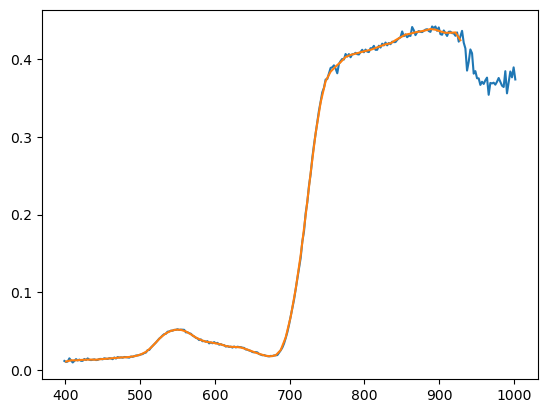

In [11]:
plt.plot(hyper_wave,zipped_h_im21_22['20220726'][39][:,15,15])
plt.plot(hyper_wave_3,prep_h['20220726'][39][:,15,15])

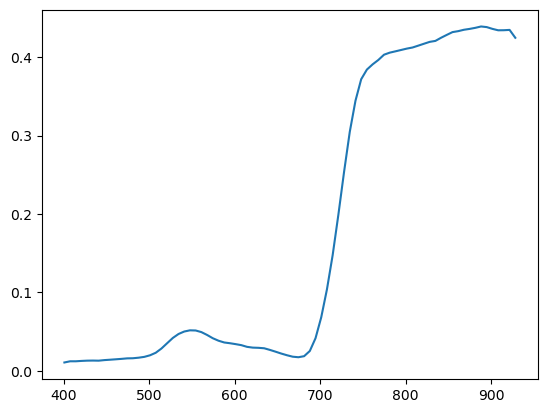

In [14]:
plt.plot(hyper_wave_3,veg_h['20220726'][39][15,15])

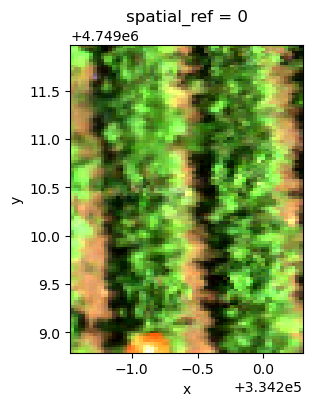

In [15]:
zipped_h_im21_22['20210715'][15][[108,69,36]].plot.imshow(robust=True, figsize=(3, 4))

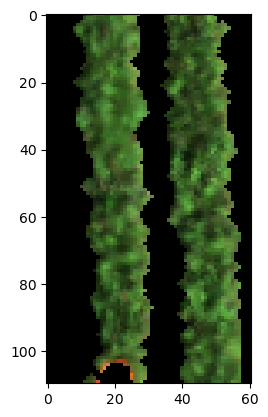

In [21]:
plt.imshow(con_stretch(veg_h['20210715'][15][:,:,[36,23,13]]))

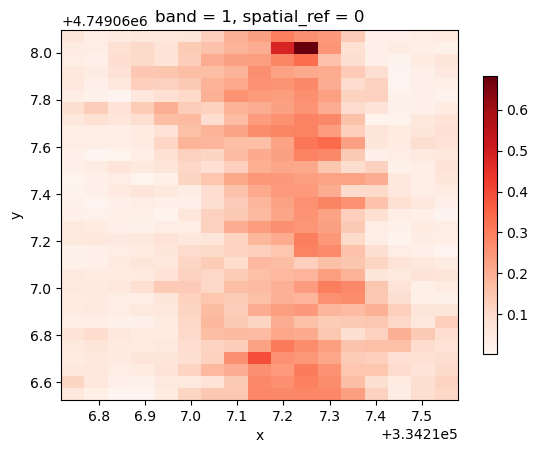

In [8]:
dict_chm_lidar_21['20210715'][1].squeeze().plot.imshow(cmap='Reds', add_colorbar=True, cbar_kwargs={'shrink': 0.75})

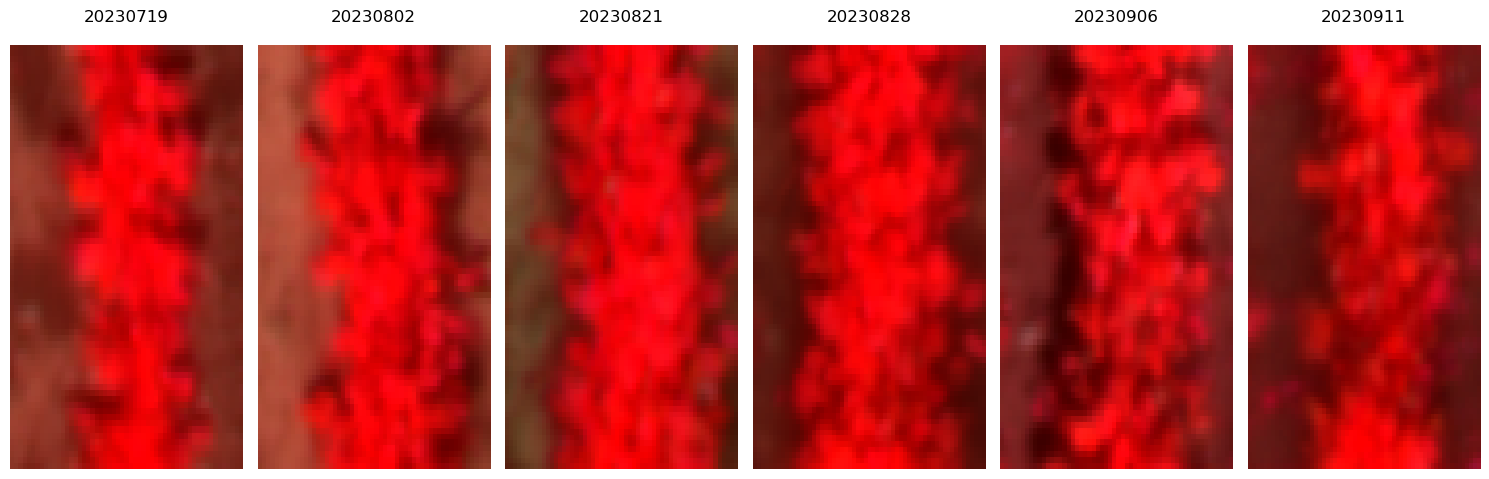

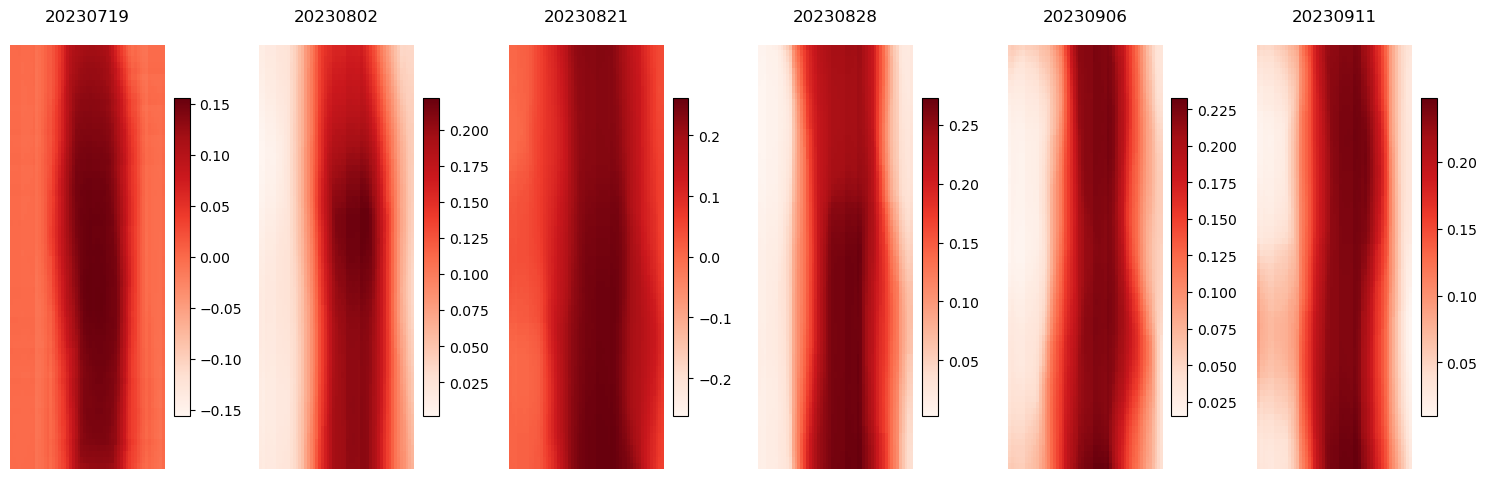

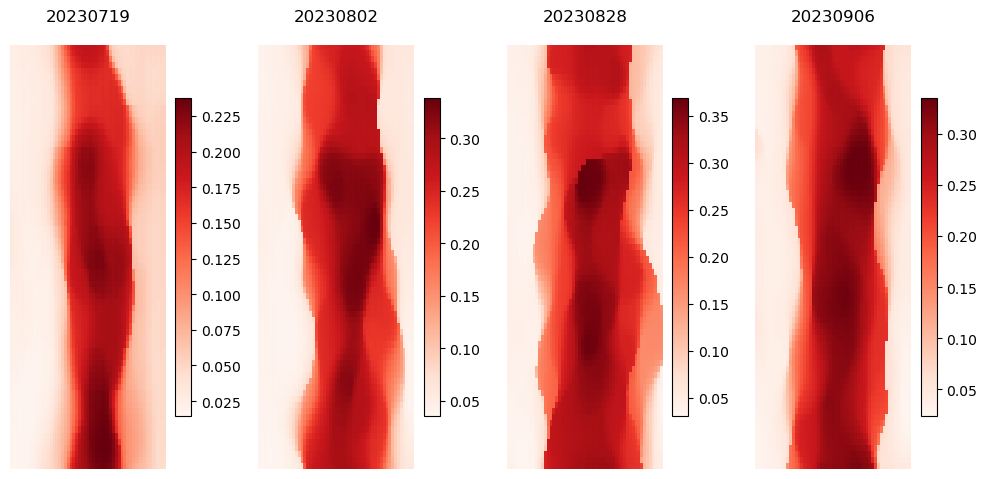

In [12]:
pltnum = 2
#plot_plt_images(dict_chm_21, pltnum, gray_scale=True)
#plot_plt_images(prep_h_22, pltnum, rb=33, gb=23, bb=11)
#plot_plt_images(dict_m_21, pltnum, rb=4, gb=2, bb=1)

plot_plt_images(dict_m_23, pltnum, rb=3, gb=1, bb=0)
plot_plt_images(dict_chm_23, pltnum, gray_scale=True)
plot_plt_images(dict_chm_23_12m, pltnum, gray_scale=True)
#plot_plt_images(veg_23['2023_chm_30m'], pltnum, gray_scale=True)

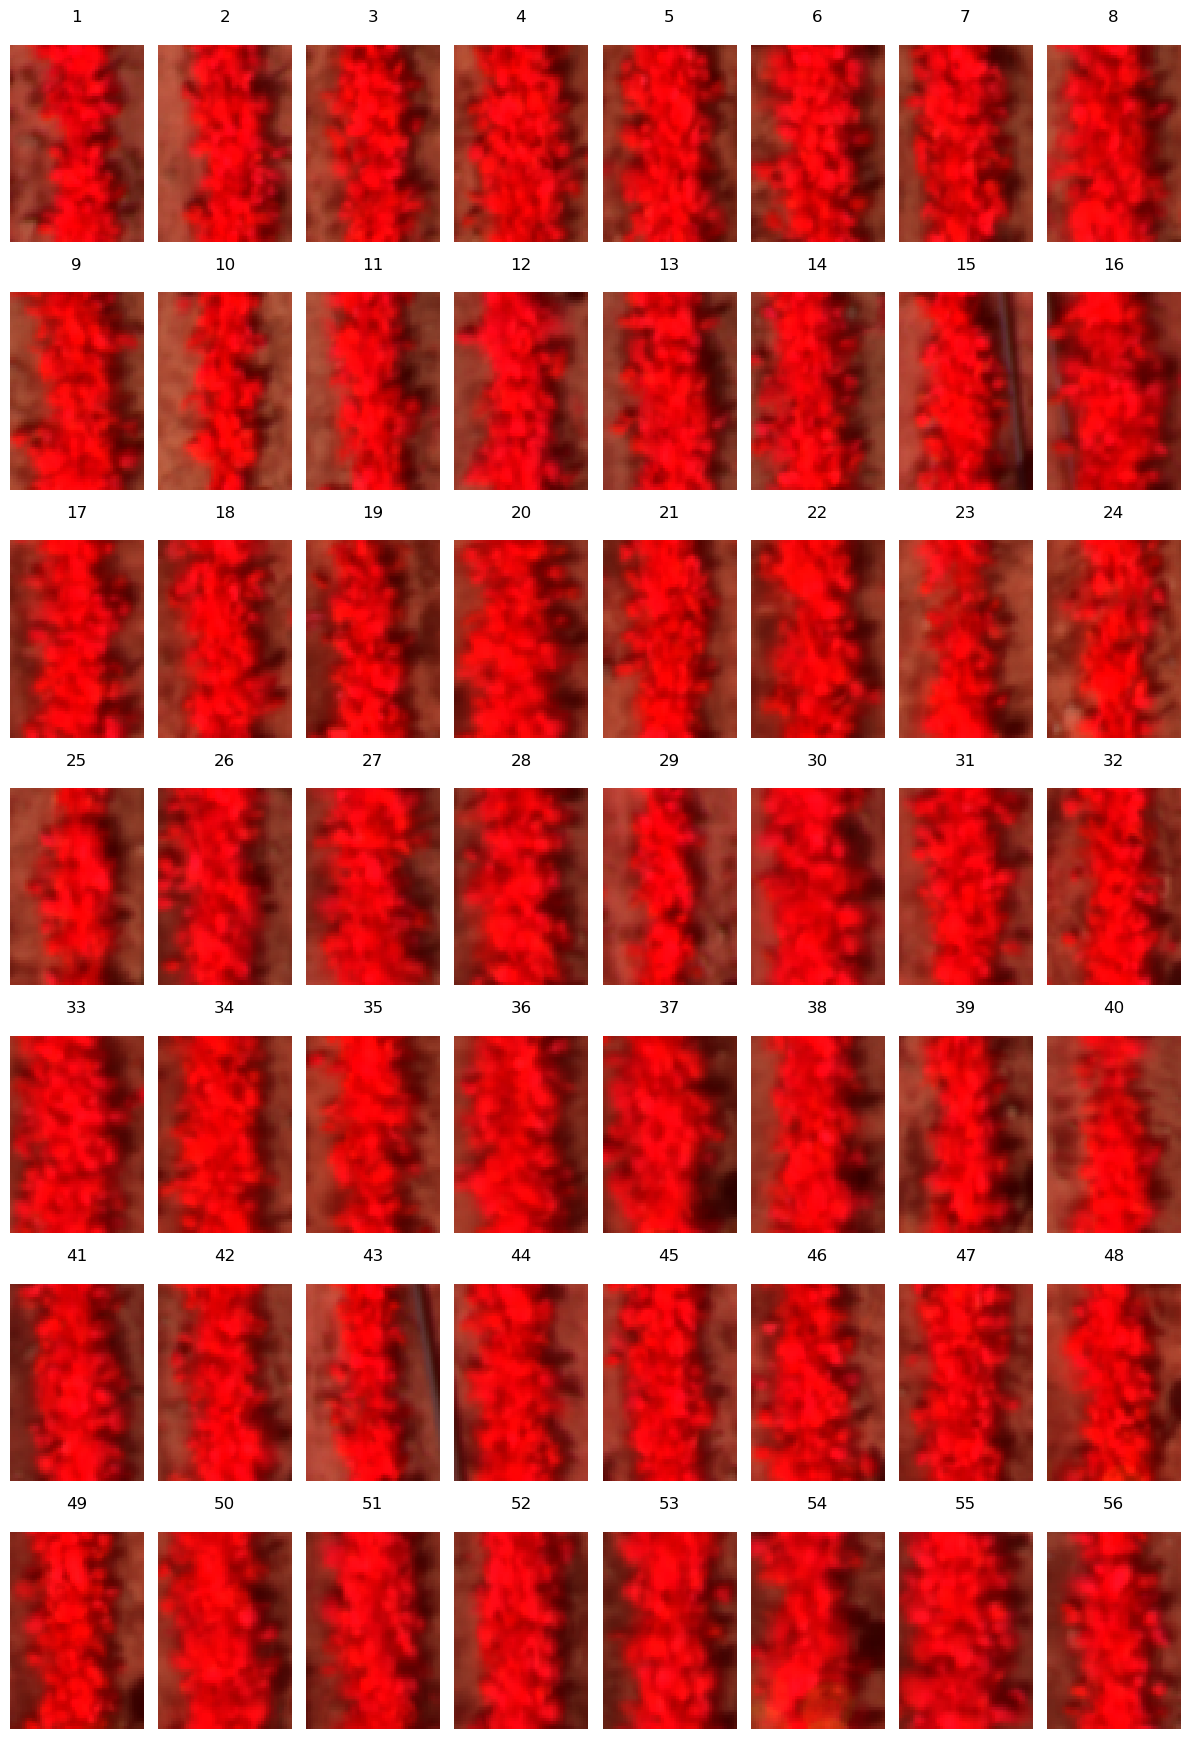

In [23]:
#plot_flt_images(dict_h_22, '20220707', rb=108, gb=66, bb=33)
#plot_flt_images(dict_m_21, '20210715', rb=2, gb=1, bb=0)
#plot_flt_images(dict_chm_21, '20210715', gray_scale=True)
#plot_flt_images(dict_chm_lidar_21, '20210715', gray_scale=True)
#plot_flt_images(dict_h_22, '20220810', rb=108, gb=66, bb=33)
#plot_flt_images(dict_m_22, '20220810', rb=2, gb=1, bb=0)
#plot_flt_images(dict_chm_22, '20220810', gray_scale=True)

plot_flt_images(dict_m_23, '20230802', rb=3, gb=1, bb=0)

### Vegetation Extraction tests

c:\Users\ms4667\.conda\envs\geo_env\lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


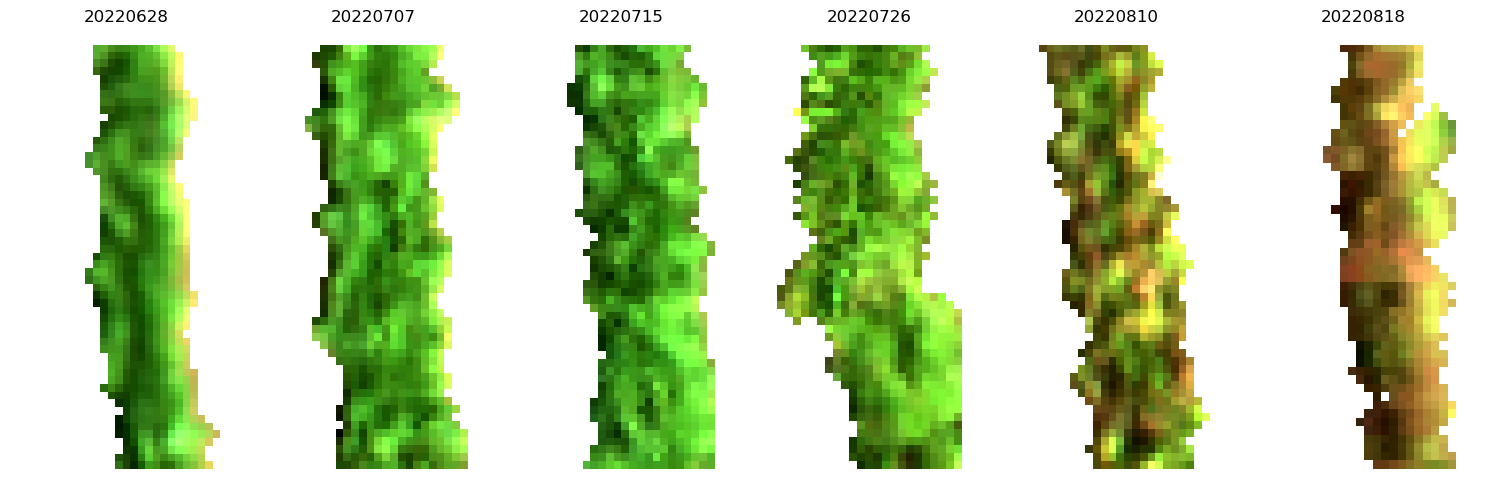

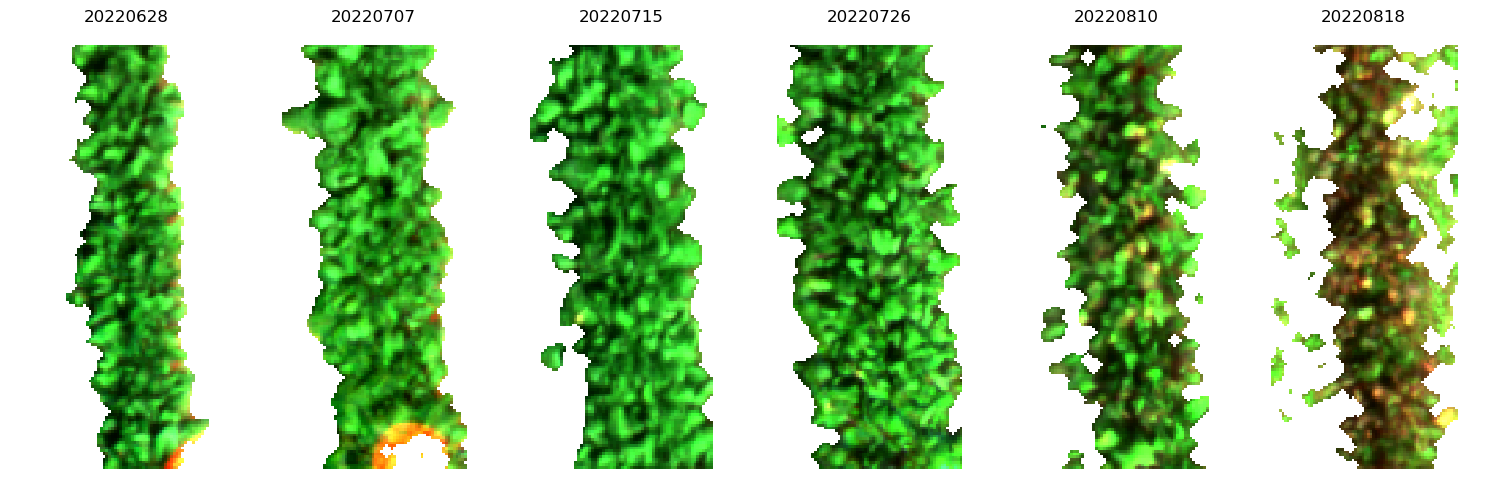

In [9]:
#veg_im, binary_mask = process_vegetation_spectral(prep_h_22['20220810'][83], data_file='data/veg_spec.txt', threshold=0.28, disk_param=1, black_region_width=3, lb=0, ub=80, skip_rows=7, sample_sig=3)
#veg_im[[36,23,11]].plot.imshow(robust=True)
plotnum=30
#plot_plt_images(veg_18['2018'], plotnum, rb=2, gb=1, bb=0)
#plot_plt_images(veg_18['2018_chm'], plotnum, gray_scale=True)
#plot_plt_images(veg_18['2018_dsm'], plotnum, gray_scale=True)
#plot_plt_images(dict_dsm_18, plotnum, gray_scale=True)
#plot_plt_images(dict_chm_18, plotnum, gray_scale=True)
#plot_plt_images(dict_m_22, plotnum, rb=2, gb=1, bb=0)
#plot_plt_images(prep_h_22, plotnum, rb=36, gb=23, bb=11)
#plot_plt_images(dict_chm_lidar_22, plotnum, gray_scale=True)
#plot_plt_images(bin_masks_22, plotnum, gray_scale=True)
plot_plt_images(prep_veg_h_22, plotnum, rb=36, gb=23, bb=11)
plot_plt_images(veg_m_22_m, plotnum, rb=2, gb=1, bb=0)
#plot_plt_images(veg_chm_22, plotnum, gray_scale=True)
#plot_plt_images(veg_h_22_mod, plotnum, rb=36, gb=23, bb=11)
#plot_plt_images(veg_23['2023'], plotnum, rb=2, gb=1, bb=0)
#plot_plt_images(dict_m_23, plotnum, rb=2, gb=1, bb=0)

<Axes: ylabel='Count'>

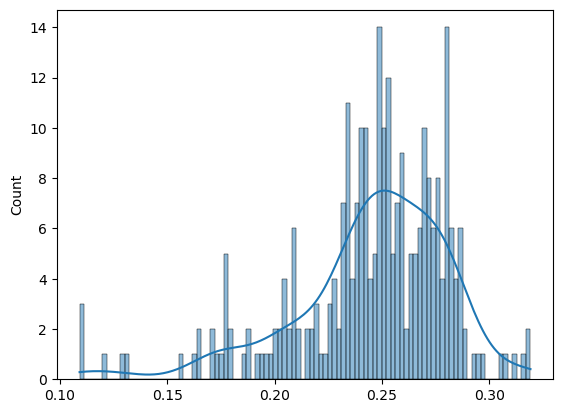

In [13]:
import seaborn as sns
sns.histplot(veg_chm_22_m['20220810'][30].values.flatten(), bins=100, kde=True)

<Axes: ylabel='Count'>

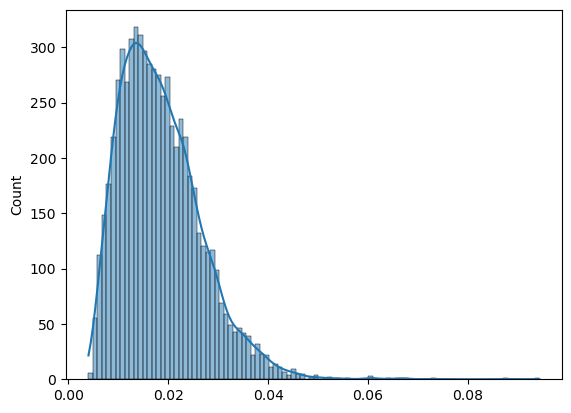

In [10]:
import seaborn as sns
sns.histplot(veg_m_22_m['20220810'][30][0].values.flatten(), bins=100, kde=True)


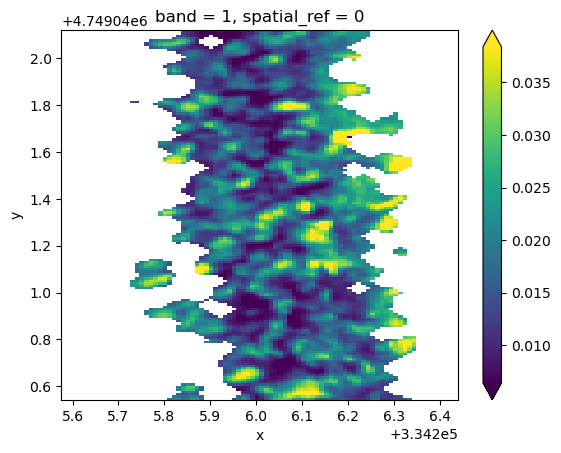

In [107]:
import pandas as pd

veg_m_22_m['20220810'][30][0].plot.imshow(robust=True)

In [127]:
dict_m_22['20220810'][30][0,45,62]

<xarray.DataArray ()>
array(nan, dtype=float32)
Coordinates:
    band         int32 1
    x            float64 3.342e+05
    y            float64 4.749e+06
    spatial_ref  int32 0
Attributes:
    _FillValue:    -10000.0
    scale_factor:  1.0
    add_offset:    0.0

In [123]:
veg_m_22_m['20220810'][30][0,45,62]

<xarray.DataArray ()>
array(-10000., dtype=float32)
Coordinates:
    band         int32 1
    x            float64 3.342e+05
    y            float64 4.749e+06
    spatial_ref  int32 0
Attributes:
    _FillValue:    -10000.0
    scale_factor:  1.0
    add_offset:    0.0

In [11]:
np.nanmean(veg_m_22_m['20220810'][30],axis=(1,2))

array([0.01846934, 0.05442009, 0.03181772, 0.15561604, 0.25907156],
      dtype=float32)

In [15]:
veg_23['2023_chm_12m'].keys()

dict_keys(['20230719', '20230802', '20230821', '20230828', '20230906', '20230911'])

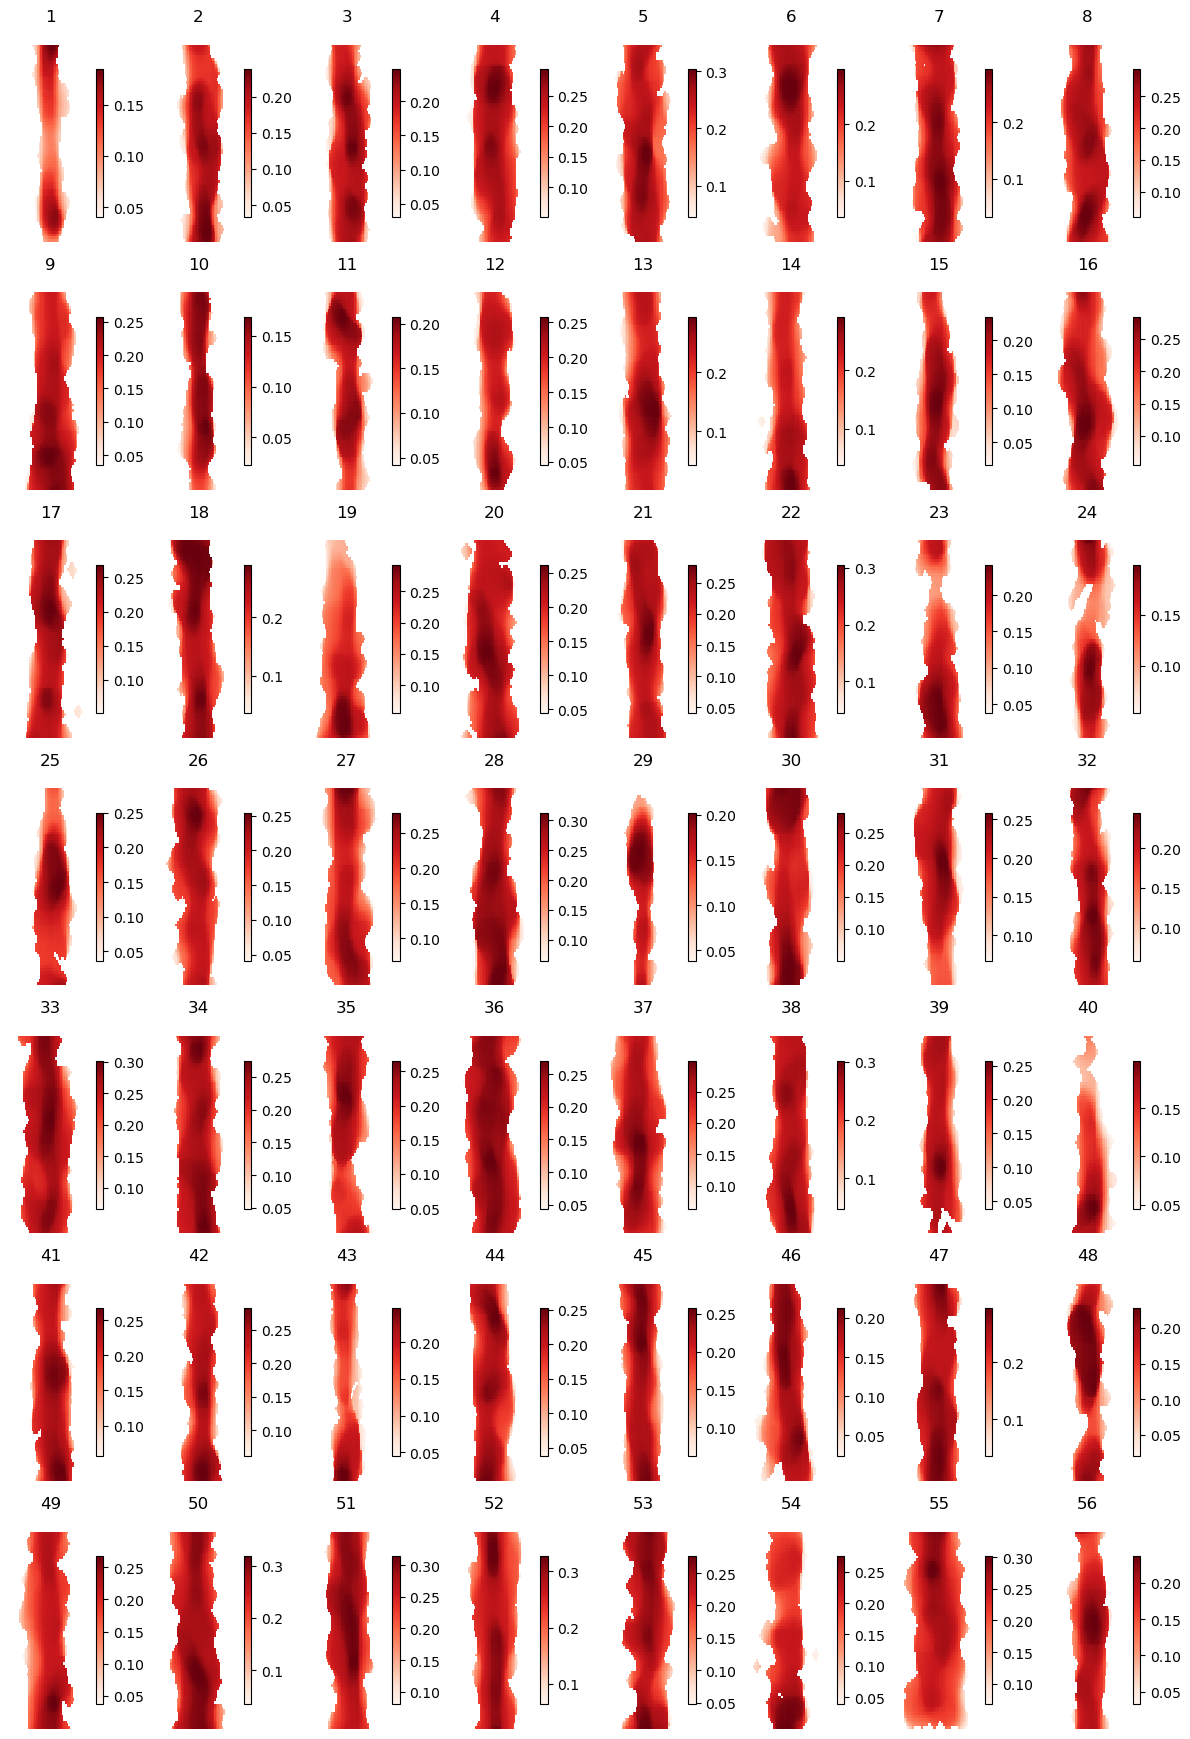

In [18]:
fltd = '20230719'
plot_flt_images(veg_23['2023_chm_12m'], fltd, gray_scale=True)
#plot_flt_images(veg_23['2023_chm'], fltd, gray_scale=True)
#plot_flt_images(veg_18['2018_chm'], fltd, gray_scale=True)
#plot_flt_images(dict_chm_18, fltd, gray_scale=True)
#plot_flt_images(dict_m_18, fltd, rb=2, gb=1, bb=0)
#plot_flt_images(veg_18['2018'], fltd, rb=2, gb=1, bb=0)
#plot_flt_images(dict_m_22, '20210616', rb=2, gb=1, bb=0)
#plot_flt_images(prep_h_22, fltd, rb=36, gb=23, bb=11)
#plot_flt_images(prep_veg_h_22, fltd, rb=36, gb=23, bb=11)
#plot_flt_images(veg_m_21, fltd, rb=2, gb=1, bb=0)
#plot_flt_images(veg_23['2023'], fltd, rb=3, gb=1, bb=0)

### CHM Correction

In [16]:
def apply_mask_to_image(xarray_image, binary_mask, chm_correction=False):
    """
    Applies a binary mask to an xarray image, masking out areas not covered by the mask.

    This function reindexes the given binary mask to match the coordinates of the xarray image. It fills any missing values in the mask with 0 (interpreted as False), ensuring the mask is boolean. The mask is then applied to the image, setting pixels outside the mask to NaN, effectively masking them out.

    Parameters:
    - xarray_image (xarray.DataArray): The input image as an xarray DataArray on which the mask will be applied.
    - binary_mask (xarray.DataArray): The binary mask as an xarray DataArray that defines the areas to keep in the xarray_image.

    Returns:
    - masked_image (xarray.DataArray): The resulting image after applying the mask, with areas outside the mask set to NaN.
    """
    # Reindex mask to match image coordinates, filling missing values with 0 (False)
    reindexed_mask = binary_mask.reindex_like(xarray_image, method='nearest', tolerance=1e-1).fillna(0).astype(bool)

    # Apply reindexed mask to image
    masked_image = xarray_image.where(reindexed_mask, np.nan)

    if chm_correction:
        # Calculate the average of the masked-out values
        average_masked_out = xarray_image.where(~reindexed_mask).mean().item()
        masked_image = masked_image-average_masked_out
        
    return masked_image

def veg_extract_chm(chm_dict, bin_dict, chm_correction=False):
    '''
    Extracts vegetation from a dictionary of chm or image using binary mask.
    '''
    # Create dictionaries to hold the processed and binary images
    processed_chm = {}

    # Iterate over the outer dictionary
    for outer_key, outer_value in chm_dict.items():
        processed_chm[outer_key] = {}

        # Iterate over the inner dictionary
        for inner_key, image in outer_value.items():
            processed_chm[outer_key][inner_key] = apply_mask_to_image(image, bin_dict[outer_key][inner_key],chm_correction=chm_correction)

    return processed_chm

#veg_chm_21 = veg_extract_chm(dict_chm_21, bin_masks_21)
veg_chm_21_cor = veg_extract_chm(dict_chm_21, bin_masks_21, chm_correction=True)

#veg_chm_22 = veg_extract_chm(dict_chm_22, bin_masks_22)
veg_chm_22_cor = veg_extract_chm(dict_chm_22, bin_masks_22, chm_correction=True)

In [12]:
# Testing saved data
veg_chm = pickle.load(open('data/preprocessed/veg_chm.pkl', 'rb'))
veg_chm_21 = veg_chm['2021']
veg_chm_22 = veg_chm['2022']

veg_chm_lidar_21 = veg_chm['2021_lidar']
veg_chm_lidar_22 = veg_chm['2022_lidar']

In [14]:
from src.prep_func import apply_functions_to_images

def mean_item(arr, **kwargs):
    return np.mean(arr, **kwargs).item()

veg_chm_21_mean = apply_functions_to_images(veg_chm_21, [(mean_item,{})])
veg_chm_lidar_21_mean = apply_functions_to_images(veg_chm_lidar_21, [(mean_item,{})])
#veg_chm_21_cor_mean = apply_functions_to_images(veg_chm_21_cor, [(mean_item,{})])

veg_chm_22_mean = apply_functions_to_images(veg_chm_22, [(mean_item,{})])
veg_chm_lidar_22_mean = apply_functions_to_images(veg_chm_lidar_22, [(mean_item,{})])
#veg_chm_22_cor_mean = apply_functions_to_images(veg_chm_22_cor, [(mean_item,{})])

Processing images: 100%|██████████| 72/72 [00:00<00:00, 4000.77it/s]


Processing images: 100%|██████████| 528/528 [00:00<00:00, 4715.69it/s]


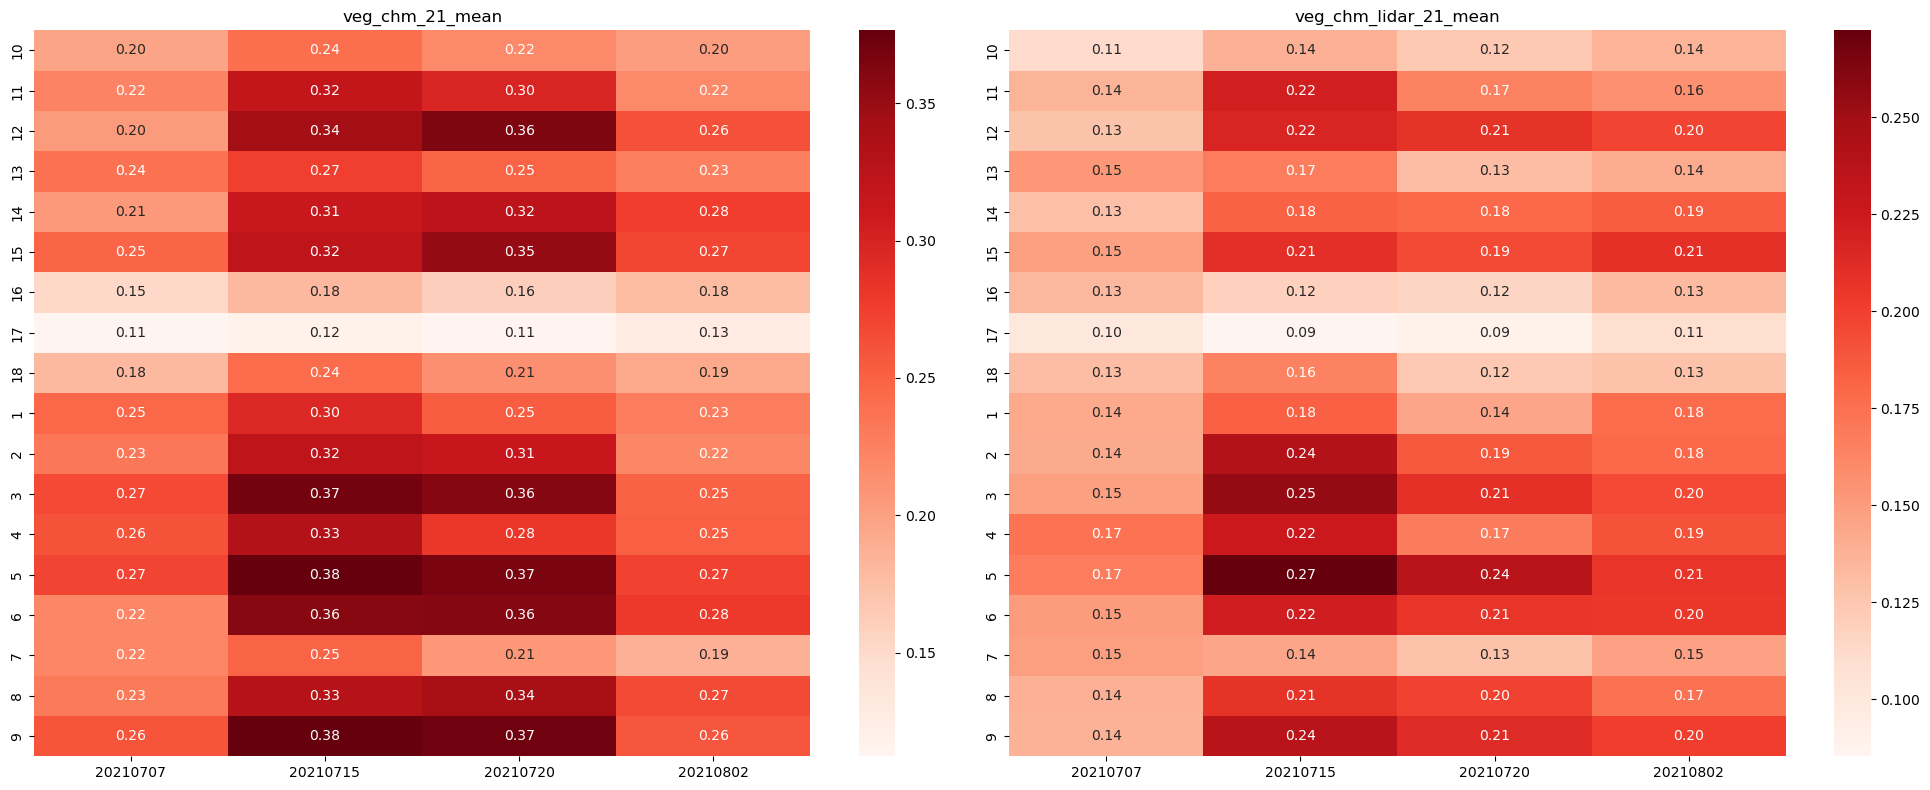

In [15]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a figure with 2 subplots side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot the first heatmap on the first axis
sns.heatmap(pd.DataFrame(veg_chm_21_mean), annot=True, fmt=".2f", cmap='Reds', ax=axs[0])
axs[0].set_title('veg_chm_21_mean')

# Plot the second heatmap on the second axis
sns.heatmap(pd.DataFrame(veg_chm_lidar_21_mean), annot=True, fmt=".2f", cmap='Reds', ax=axs[1])
axs[1].set_title('veg_chm_lidar_21_mean')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [25]:
np.mean(pd.DataFrame(veg_chm_22_mean) - pd.DataFrame(veg_chm_lidar_22_mean))

c:\Users\ms4667\.conda\envs\geo_env\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


20220628    0.026575
20220707    0.041425
20220715    0.064285
20220726    0.031991
20220810    0.017282
20220818    0.033023
dtype: float64

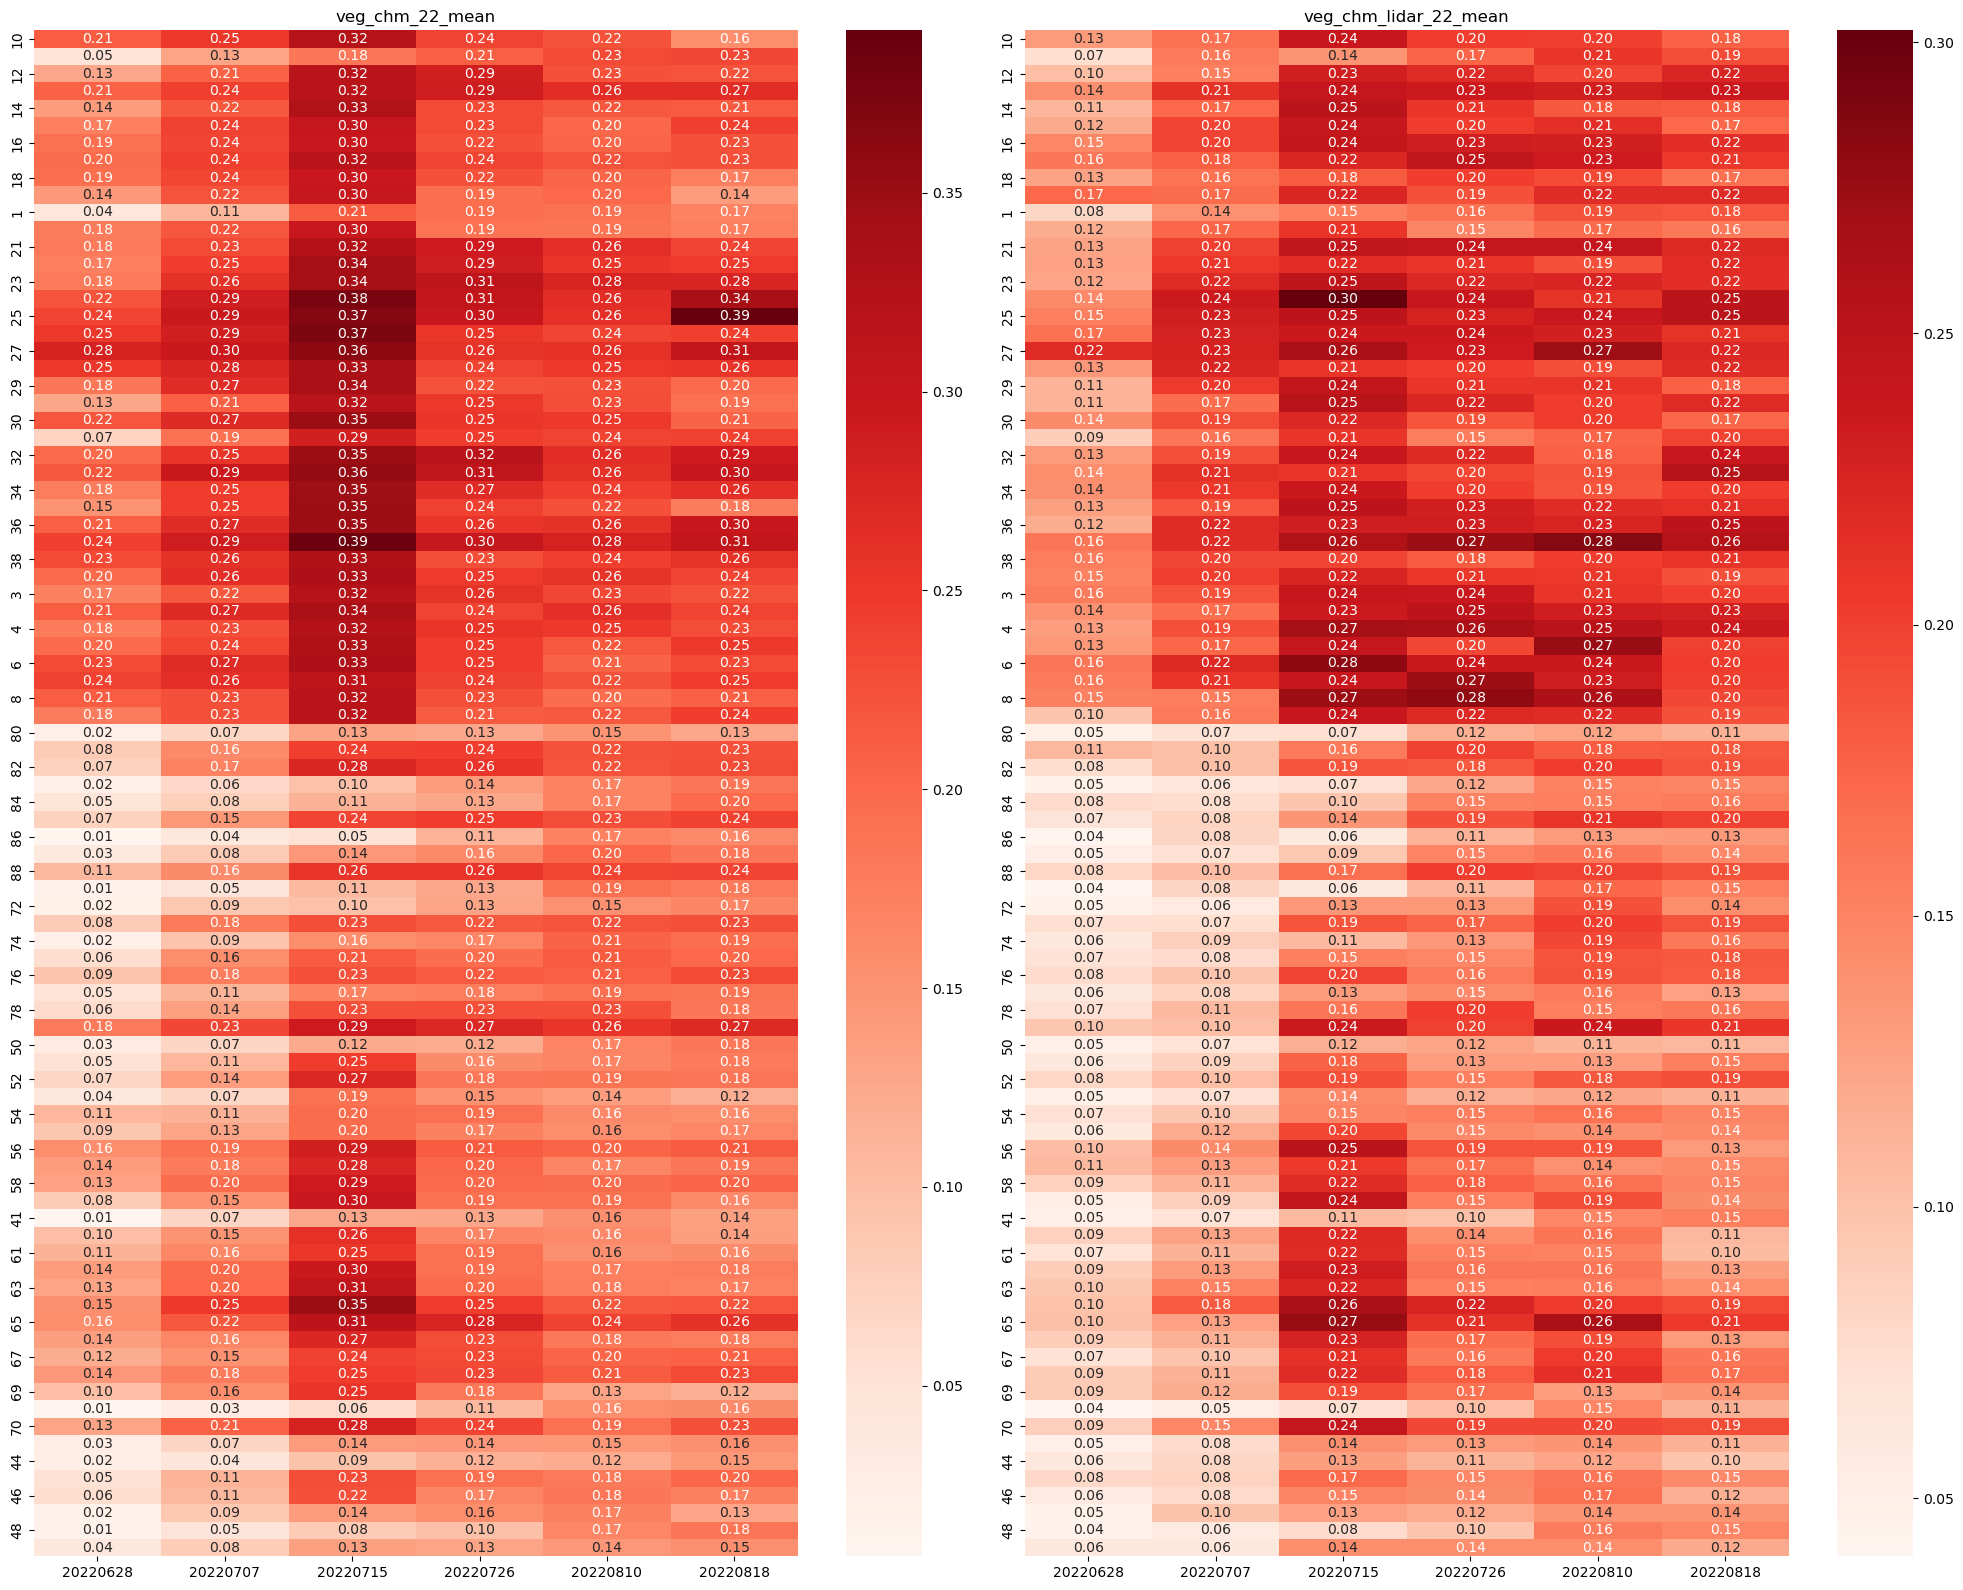

In [19]:
# Create a figure with 2 subplots side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 16))

# Plot the first heatmap on the first axis
sns.heatmap(pd.DataFrame(veg_chm_22_mean), annot=True, fmt=".2f", cmap='Reds', ax=axs[0])
axs[0].set_title('veg_chm_22_mean')

# Plot the second heatmap on the second axis
sns.heatmap(pd.DataFrame(veg_chm_lidar_22_mean), annot=True, fmt=".2f", cmap='Reds', ax=axs[1])
axs[1].set_title('veg_chm_lidar_22_mean')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [16]:
pd.DataFrame(veg_chm_lidar_22_mean).head(20)

20220628  20220707  20220715  20220726  20220810  20220818
10  0.131533  0.165281  0.240574  0.202582  0.201364  0.176992
11  0.074473  0.158655  0.137496  0.174800  0.209689  0.191883
12  0.103262  0.153218  0.231150  0.218239  0.197415  0.223287
13  0.140453  0.212072  0.241956  0.234738  0.230477  0.234649
14  0.110353  0.171719  0.250189  0.208310  0.183408  0.182100
15  0.119700  0.197271  0.241129  0.202972  0.214975  0.171858
16  0.147139  0.197709  0.243831  0.231502  0.229668  0.215052
17  0.159962  0.178359  0.222447  0.245945  0.233726  0.206005
18  0.125016  0.163448  0.181018  0.202416  0.193683  0.165664
19  0.171071  0.169462  0.223761  0.189415  0.217986  0.218610
1   0.081687  0.139846  0.152811  0.164027  0.188425  0.184979
20  0.117322  0.174074  0.209321  0.148544  0.169429  0.159375
21  0.125805  0.199882  0.245113  0.242503  0.241830  0.219655
22  0.126484  0.206721  0.216239  0.208309  0.188978  0.216105
23  0.123005  0.218376  0.247409  0.222051  0.224310  0.215693
24  0.144608  0.235202  0.302057  0.238887  0.211288  0.249943
25  0.152638  0.230485  0.249338  0.227276  0.238517  0.252147
26  0.165623  0.227378  0.236914  0.236728  0.229703  0.211674
27  0.218858  0.226724  0.264000  0.234355  0.271516  0.221724
28  0.133724  0.223618  0.209745  0.203140  0.191418  0.217932

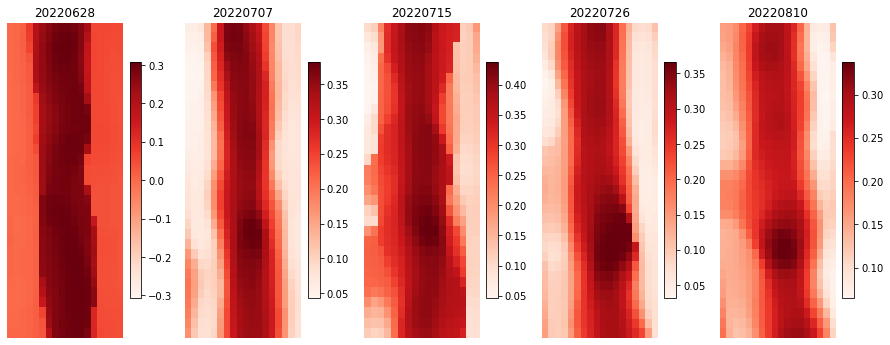

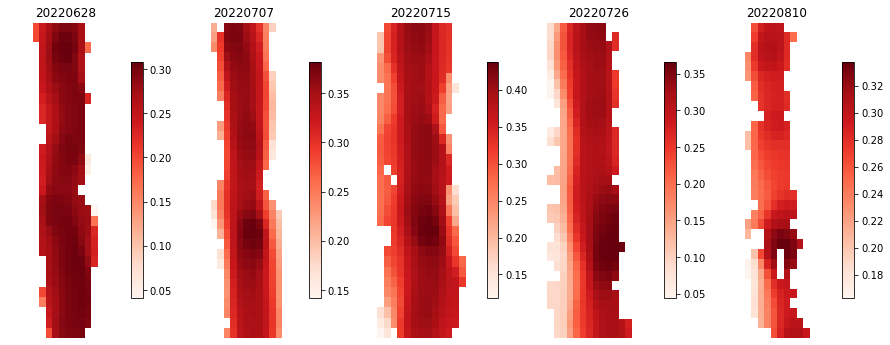

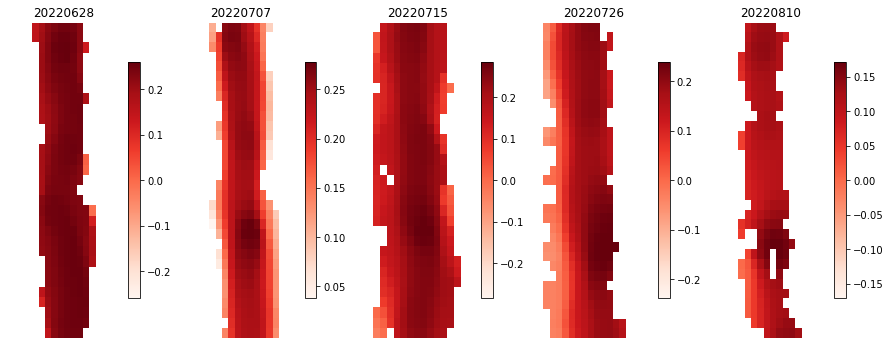

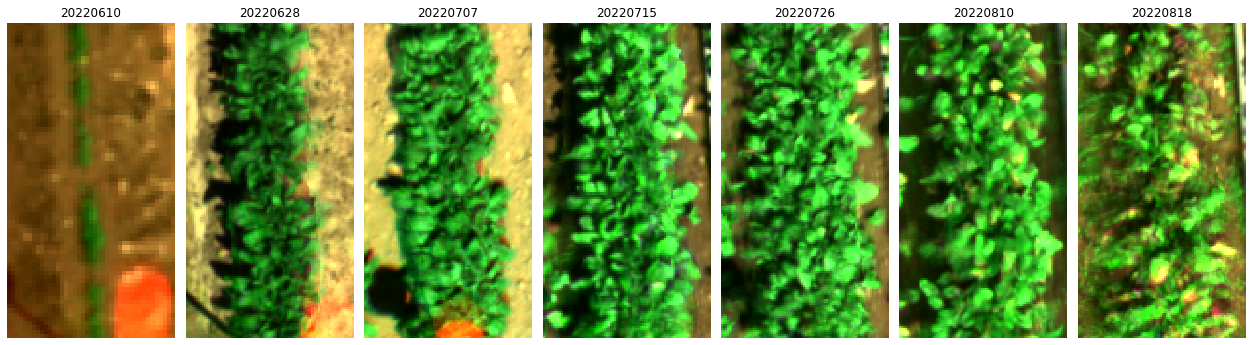

In [103]:
pltnum = 27
plot_plt_images(dict_chm_22, pltnum, gray_scale=True)
plot_plt_images(veg_chm_22, pltnum, gray_scale=True)
plot_plt_images(veg_chm_22_cor, pltnum, gray_scale=True)
plot_plt_images(dict_m_22, pltnum, rb=2, gb=1, bb=0)

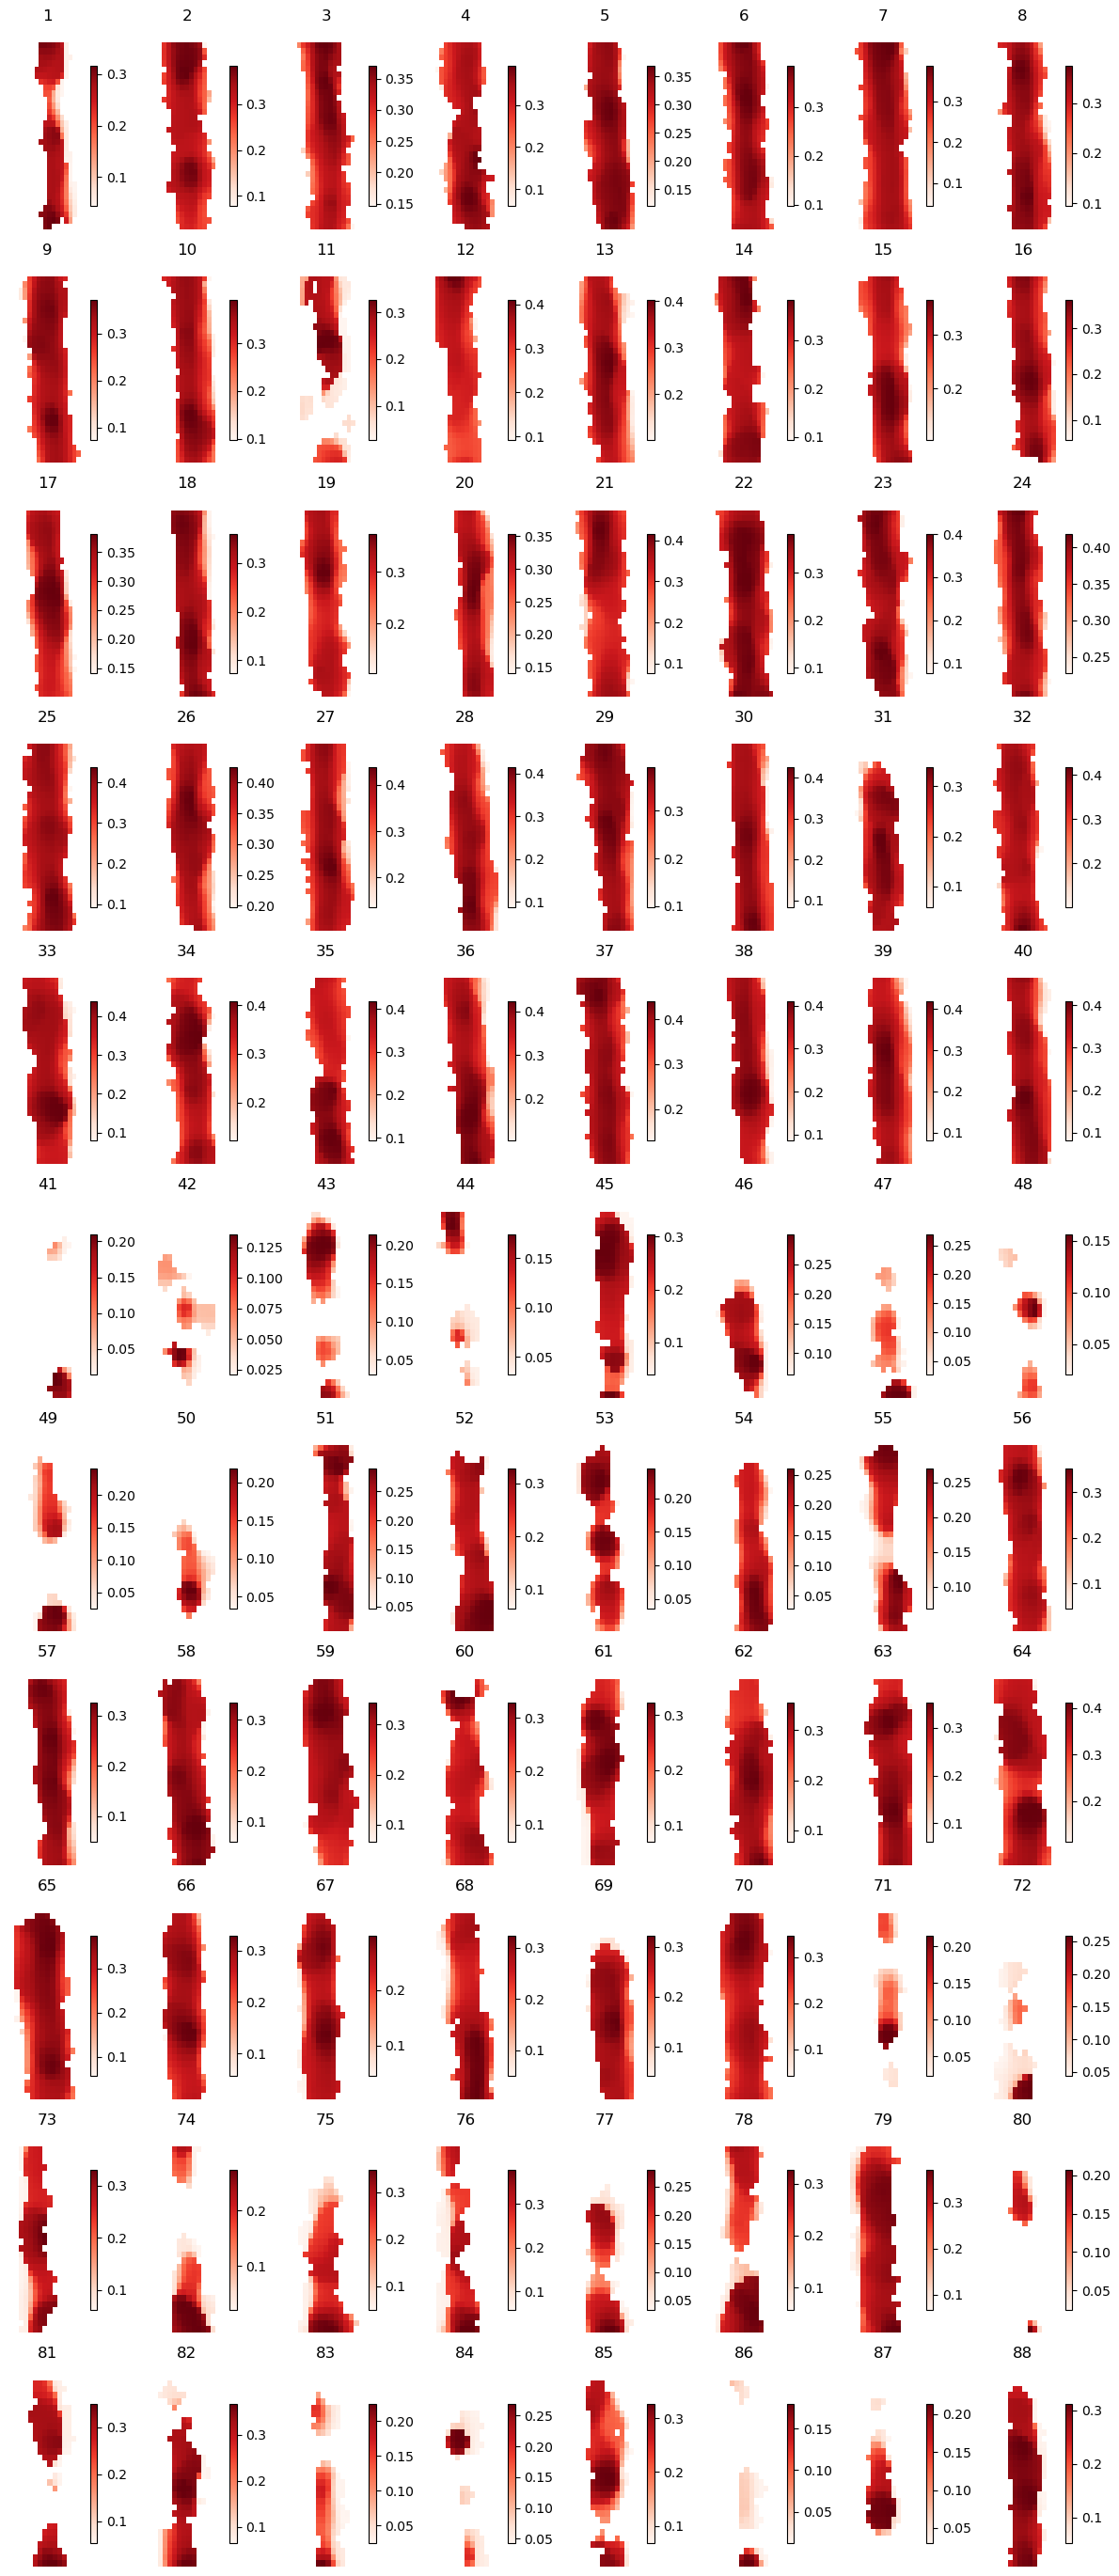

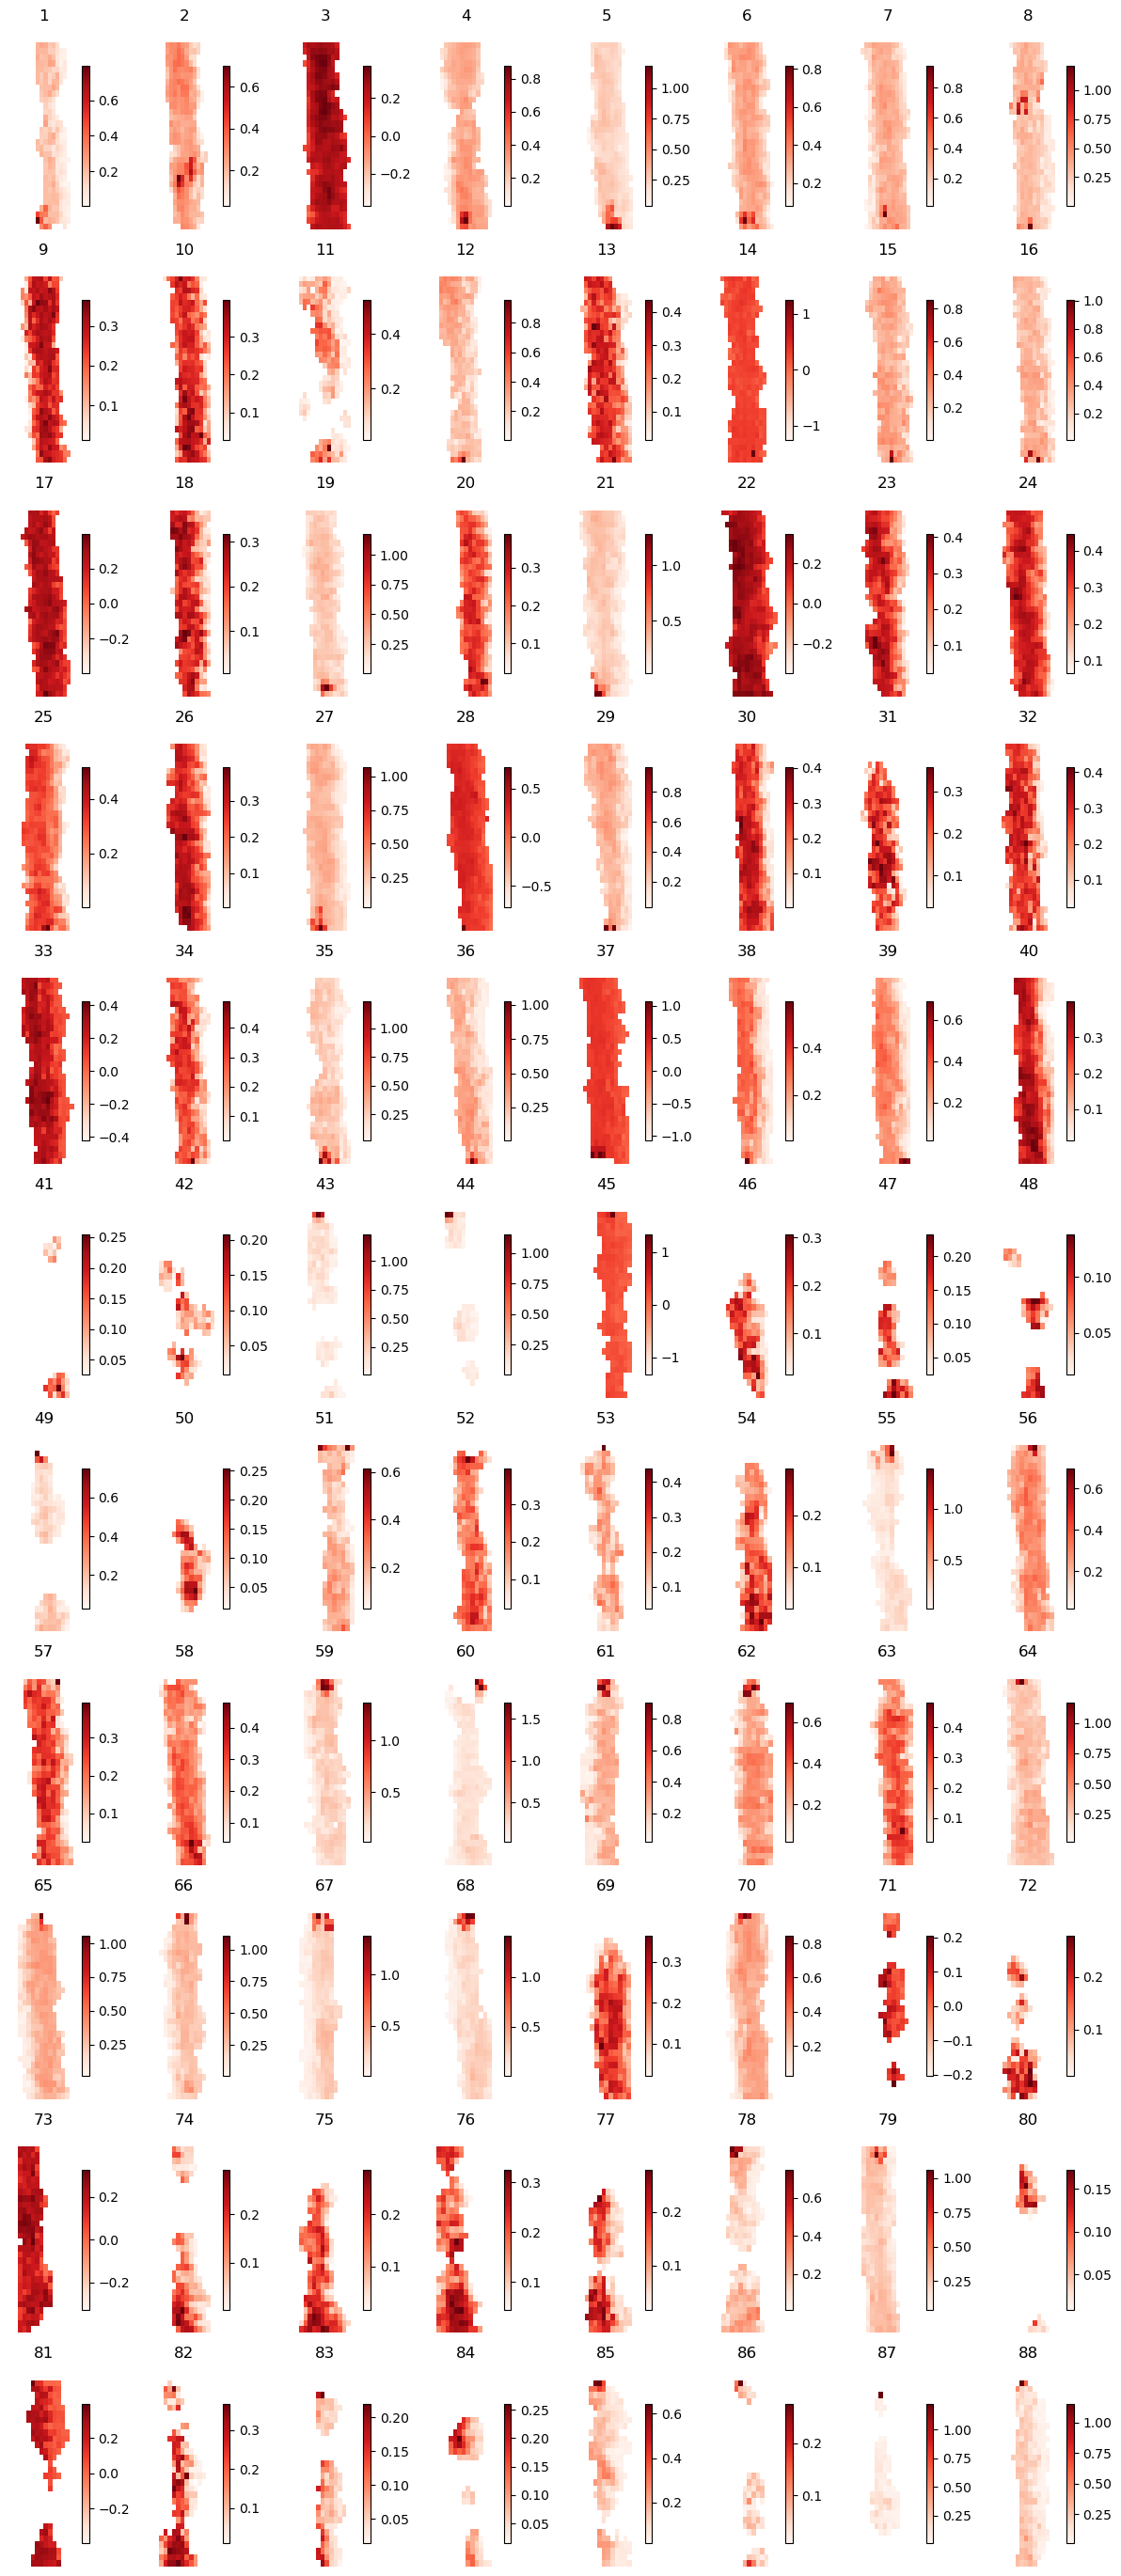

In [30]:
plot_flt_images(veg_chm_22, '20220715', gray_scale=True)
plot_flt_images(veg_chm_lidar_22, '20220715', gray_scale=True)
#plot_flt_images(veg_chm_21, '20210720', gray_scale=True)

In [ ]:
# manual clipping
chm_21['20210715'][6] = chm_21['20210715'][6].clip(max=0.25)

(-0.5, 76.5, 149.5, -0.5)

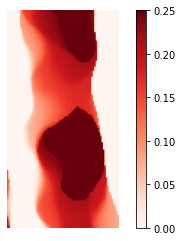

In [ ]:
from  src.prep_func import apply_gaussian_blur
plt.imshow(chm_21['20210715'][6].squeeze().clip(max=0.25), cmap='Reds')
plt.colorbar()
plt.axis('off')

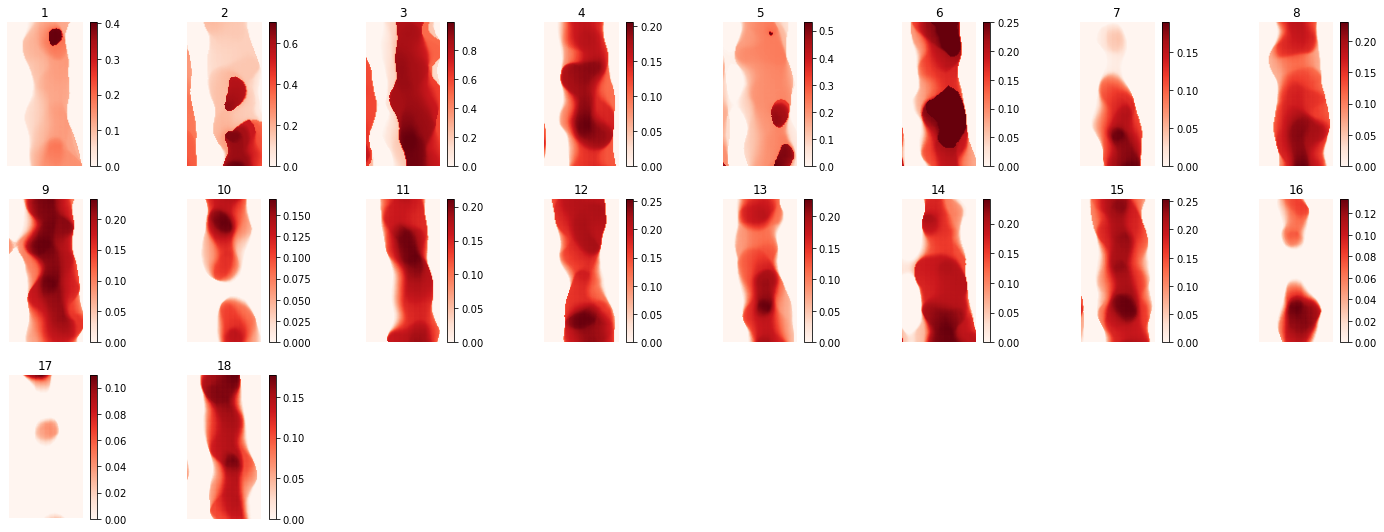

In [ ]:
plot_flt_chm(chm_21, '20210715')

### 2018 data load test

In [58]:
import re
def zip_images_18(r_dir, div_100=False):
    """
    This function takes a directory of images and loads them into a dictionary as xarray.
    The dictionary is structured with flight dates as keys, each containing another dictionary with plot numbers as keys and the corresponding image as the value.

    Parameters:
    r_dir (str): The directory where the images are stored.
    div_100 (bool): If True, the function divides the image values by 100.

    Returns:
    plot_im_all (dict): A dictionary containing the processed images, structured by flight date and plot number.
    Example usage: plot_im_all['20210707'][11] to access the image for flight date 20210707, plot 11.
    """
    plot_im_all = {}
    count = 0
    for flt_date in os.listdir(r_dir):
        flt_dir = os.path.join(r_dir, flt_date)
        if os.path.isdir(flt_dir):
            plot_im_all[flt_date] = {}
            for rfile in os.listdir(flt_dir):
                # Filter files with .tif extension or no extension
                if rfile.endswith('.tif') or '.' not in rfile:
                    rpath = os.path.join(flt_dir, rfile)
                    im = rioxarray.open_rasterio(rpath)
                    if div_100:
                        im = im / 100
                    # Extract plot number using regex
                    match = re.match(r'plot(\d+)_', rfile)
                    if match:
                        plt_num = int(match.group(1))
                        plot_im_all[flt_date][plt_num] = im
                        count += 1
    print(f'zipped {count} images')
    return plot_im_all


In [26]:
test_m_21 = zip_images('data/multi/2021', panels=False)

zipped 108 images


In [59]:
dict_m_18 = zip_images_18('data/2018_multi/ref')

zipped 150 images


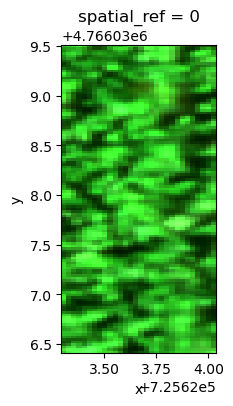

In [12]:
dict_m_18['20180809'][6][[2,1,0]].plot.imshow(robust=True, figsize=(2,4))

In [31]:
np.mean(dict_m_18['20180809'][2], axis=(1,2))

<xarray.DataArray (band: 5)>
array([0.02808024, 0.09599225, 0.03550098, 0.25424173, 0.6330869 ],
      dtype=float32)
Coordinates:
  * band         (band) int32 1 2 3 4 5
    spatial_ref  int32 0